In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [94]:
from mlxtend.frequent_patterns import apriori,association_rules

In [95]:
data=pd.read_csv('D:/DATA SCIENCE/ASSIGNMENT/AS1/my_movies.csv')

In [96]:
data.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [97]:
data.drop("V1",axis=True)

,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [98]:
data_filtered=data.drop(columns=['V1','V2','V3','V4','V5'],axis=True)

In [132]:
data_filtered

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


In [100]:
formula=apriori(data_filtered,min_support=0.0001,use_colnames=True,max_len=2)

In [101]:
formula

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [135]:
asso_rule=association_rules(formula,metric="lift",min_threshold=0.9)
asso_rule.sort_values('consequent support')

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
31,(Green Mile),(LOTR),0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000
26,(Patriot),(Braveheart),0.6,0.1,0.1,0.166667,1.666667,0.04,1.08,1.000000
4,(Sixth Sense),(LOTR),0.6,0.1,0.1,0.166667,1.666667,0.04,1.08,1.000000
22,(Harry Potter1),(Harry Potter2),0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000
10,(Gladiator),(LOTR),0.7,0.1,0.1,0.142857,1.428571,0.03,1.05,1.000000
12,(Gladiator),(Braveheart),0.7,0.1,0.1,0.142857,1.428571,0.03,1.05,1.000000
29,(Green Mile),(LOTR2),0.2,0.2,0.1,0.500000,2.500000,0.06,1.60,0.750000
28,(LOTR2),(Green Mile),0.2,0.2,0.1,0.500000,2.500000,0.06,1.60,0.750000
25,(Green Mile),(Harry Potter1),0.2,0.2,0.1,0.500000,2.500000,0.06,1.60,0.750000
24,(Harry Potter1),(Green Mile),0.2,0.2,0.1,0.500000,2.500000,0.06,1.60,0.750000


In [127]:
support=asso_rule['support']
confidence=asso_rule['confidence']

Text(0, 0.5, 'confidence')

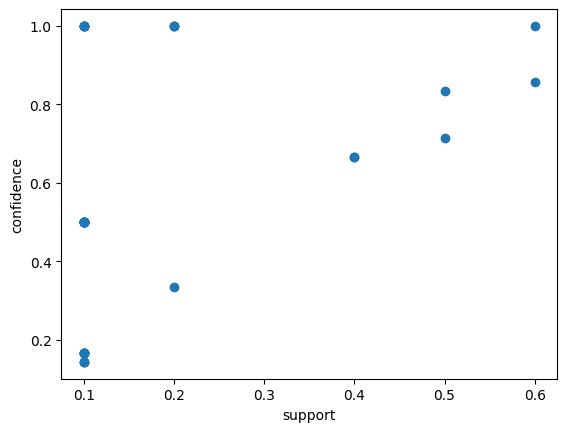

In [130]:
plt.scatter(support,confidence)
plt.xlabel(xlabel='support')
plt.ylabel(ylabel='confidence')



<Axes: xlabel='support', ylabel='confidence'>

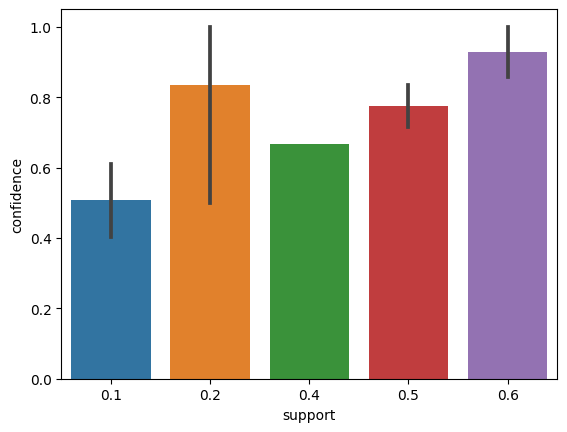

In [105]:
sns.barplot(formula,x=support,y=confidence)

In [116]:
green_mile=asso_rule[asso_rule.consequents==frozenset({'Green Mile'})]
green_mile

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
12,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.200000,1.000000
20,(Gladiator),(Green Mile),0.7,0.2,0.1,0.142857,0.714286,-0.04,0.933333,-0.571429
26,(LOTR1),(Green Mile),0.2,0.2,0.1,0.500000,2.500000,0.06,1.600000,0.750000
32,(Harry Potter1),(Green Mile),0.2,0.2,0.1,0.500000,2.500000,0.06,1.600000,0.750000
36,(LOTR2),(Green Mile),0.2,0.2,0.1,0.500000,2.500000,0.06,1.600000,0.750000
38,(LOTR),(Green Mile),0.1,0.2,0.1,1.000000,5.000000,0.08,inf,0.888889


In [137]:
data

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1
